# TP 1

In [81]:
import numpy as np
import matplotlib.pyplot as plt

### Ex 2.16

In [82]:
from scipy.integrate import odeint

T,N=150.0,150
h=T/N
S0,I0,R0=1e+6,10,0
r,a=0.5,0.33

Question 1 : En utilisant la librairie odeint.

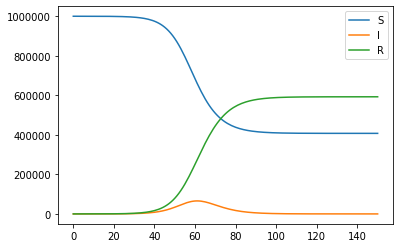

In [83]:
def sir(y, t, r, a):
  S,I,R= y
  ntotal=S+I+R
  dydt = np.array([-r*S*I/ntotal, r*S*I/ntotal-a*I,a*I])
  return dydt

y0 = [S0,I0,R0]
t = np.linspace(0, T, N+1,endpoint=True)
sol = odeint(sir, y0, t, args=(r, a)) 
#T = maillage, y0 = sol initiale
#plt.figure(1)
#plt.subplot(1,3,1)
#plt.title("S")
#plt.plot(t,sol[:,0])
#plt.subplot(1,3,2)
#plt.title("I")
#plt.plot(t,sol[:,1])
#plt.subplot(1,3,3)
#plt.title("R")
#plt.plot(t,sol[:,2])

plt.figure(2)
plt.plot(t,sol[:,0],t,sol[:,1],t,sol[:,2])
plt.legend(["S","I","R"])

Question 2. Première méthode par Euler Explicite : 

In [84]:
#Euler Explicite

#1ere tentative : 
def eulerSIR1(f, S0, I0, R0, T, N):
    h = T/N

    S = np.zeros((N+1,1))
    I = np.zeros((N+1,1))
    R = np.zeros((N+1,1))
    y_0 = [S,I,R]
    S[0]=S0
    I[0]=I0
    R[0]=R0


    for i in range(N):
        S[i+1]=S[i]+h*(-r)*S[i]*I[i]
        I[i+1]=I[i]+r*S[i]*I[i]-a*I[i]
        R[i+1]=R[i]-a*I[i]

    return y


#2eme tentative : 

def eulerSIR(f, y0, t, args=()):
    N = len(t)
    y = np.zeros((N, len(y0)))
    y[0] = y0
    for i in range(N - 1):
        y[i+1] = y[i] + (t[i+1] - t[i]) * f(y[i], t[i], *args)
    return y

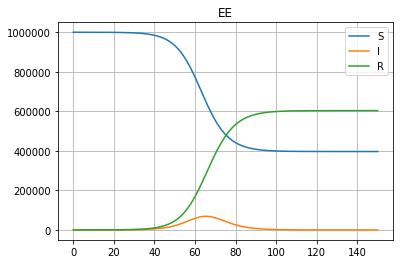

In [85]:
y0 = np.array([S0,I0,R0])
t = np.linspace(0,T,N+1, endpoint = True)
sol = eulerSIR(sir, y0, t , args = (r,a))

plt.figure(1)
plt.plot(t,sol[:,0],t,sol[:,1],t,sol[:,2])
plt.legend(["S","I","R"])
plt.title('EE')
plt.grid()
plt.show()

Par Heun :


In [86]:
def heun(f, y0, t, args=()):
    N = len(t)
    y = np.zeros((N, len(y0)))
    y[0] = y0
    for i in range(N - 1):
        h = t[i+1] - t[i]
        #y[i+1] = y[i] + h/2.0 * (f(y[i], t[i], *args) + f(y[i] +f(y[i], t[i], *args), t[i+1], *args))
        # Nous avions fais une erreur lors du tp de la denière fois qui a été modifiée ici
        y[i+1] = y[i] + h/2.0 * (f(y[i], t[i], *args) + f(y[i] + h * f(y[i], t[i], *args), t[i+1], *args))
    return y

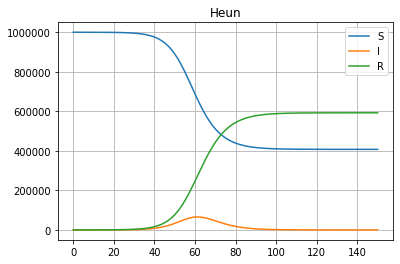

In [87]:
y0 = np.array([S0,I0,R0])
t = np.linspace(0,T,N+1, endpoint = True)
sol = heun(sir, y0, t , args = (r,a))

plt.figure(1)
plt.plot(t,sol[:,0],t,sol[:,1],t,sol[:,2])
plt.legend(["S","I","R"])
plt.title('Heun')
plt.grid()
plt.show()

Runge Kutta : 

In [88]:
def rungekutta4(f, y0, t, args=()):
    N = len(t)
    y = np.zeros((N, len(y0)))
    y[0] = y0
    for i in range(N - 1):
        h = t[i+1] - t[i]
        K1=f(y[i],t[i], *args)
        K2=np.array(f(y[i]+ (t[i+1]-t[i])/2*K1,t[i]+(t[i+1]-t[i])/2, *args))
        K3=np.array(f(y[i]+ (t[i+1]-t[i])/2*K2,t[i]+(t[i+1]-t[i])/2, *args))
        K4=np.array(f(y[i]+ (t[i+1]-t[i])*K3,t[i]+(t[i+1]-t[i]), *args))
        y[i+1]=y[i]+h/6. *(K1+2*K2+2*K3+K4)
    return y

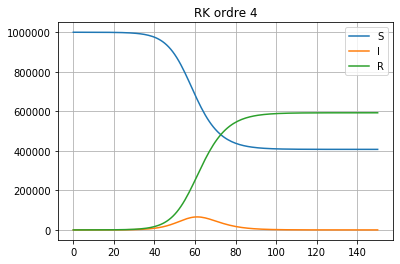

In [89]:
y0 = np.array([S0,I0,R0])
t = np.linspace(0, T, N+1,endpoint=True)
sol = rungekutta4(sir, y0, t, args=(r, a))

plt.figure(1)
plt.plot(t,sol[:,0],t,sol[:,1],t,sol[:,2])
plt.legend(["S","I","R"])
plt.title('RK ordre 4')
plt.grid()
plt.show()

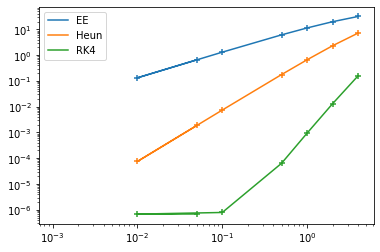

In [102]:
from scipy.spatial import distance
hrange = np.array([0.05, 0.01, 0.1, 0.5, 1, 2, 4])
T0,T = 52,60 
error_euler,error_heun, error_rungekutta4 = np.zeros(len(hrange)),np.zeros(len(hrange)),np.zeros(len(hrange))


i=0
for h in hrange : 
    N = int((T-T0)/h)
    #On choisit une solution entre T0 et T (c'est ce qui est demandé dans l'énoncé)
    t = np.linspace(T0, T, N+1,endpoint=True)
    last = len(t)-1
    #solution type : avec la fonction odeint
    Odeint = odeint(sir,y0,t,args=(r, a))

    #solutions codées manuellement
    Euler = eulerSIR(sir, y0, t, args=(r, a))
    Heun = heun(sir, y0, t, args=(r, a))
    RK = rungekutta4(sir, y0, t, args=(r, a))
    
    #Calcul de l'erreur pour h à partir de la solution au temps T (dernier temps)
    last = len(t) - 1
    error_euler[i] = abs(Euler[last,0] - Odeint[last,0])
    error_heun[i] = abs(Heun[last,0] - Odeint[last,0])
    error_rungekutta4[i] = abs(RK[last,0] - Odeint[last,0])
    
    i+=1
    

plt.figure(1)
plt.scatter(hrange, error_euler, marker = '+')
plt.scatter(hrange, error_heun, marker = '+')
plt.scatter(hrange, error_rungekutta4, marker = '+')
plt.plot(hrange,error_euler,hrange,error_heun,hrange,error_rungekutta4)
plt.xscale("log")
plt.yscale("log")
plt.legend(["EE","Heun","RK4"])
plt.show()

Ordre des schémas numériques : 


In [103]:
Ordre_EE = np.polyfit(hrange,error_euler,1)
print("l'ordre du schéma EE est",Ordre_EE[0])

l'ordre du schéma EE est 7.98282128735566


In [113]:
Ordre_H = np.polyfit(hrange,error_heun,2)
print("l'ordre du schéma Heun est",Ordre_H[0])

l'ordre du schéma Heun est 0.33671124076765496


In [105]:
Ordre_RK = np.polyfit(hrange,error_rungekutta4,4)
print("l'ordre du schéma Rungekutta4 est",Ordre_RK[0])

l'ordre du schéma Rungekutta4 est 0.00028482294325951943


Text(0.5, 1.0, 'Ordre des méthodes EE, Heun et RK4')

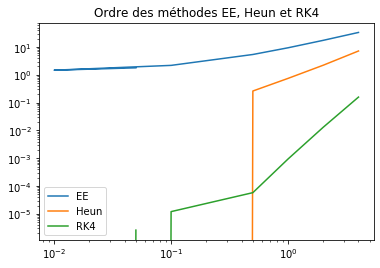

In [115]:
plt.loglog(hrange, Ordre_EE[0] * hrange + Ordre_EE[1] , hrange, Ordre_H[0] * hrange**2 + Ordre_H[1] * hrange + Ordre_H[2], hrange, Ordre_RK[0] * hrange**4 + Ordre_RK[1] * hrange**3 + Ordre_RK[2]* hrange**2 + Ordre_RK[3]* hrange**1 + Ordre_RK[4])
plt.legend(["EE","Heun","RK4"])
plt.title("Ordre des méthodes EE, Heun et RK4") 